In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 500)

In [3]:
country = pd.read_csv('Country-data.csv')
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [4]:
# Checking if the data has any null values
100*(country.isnull().sum()/country.shape[0])


country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [5]:
# Checking the Shape and Dimentions of data
print('Dataset Shape:',country.shape)

Dataset Shape: (167, 10)


In [6]:
# Checking the statistical metrics of all the continous variables
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Checking the Datatype and other informations
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
country_1 = country.drop('country', axis=1)
country_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


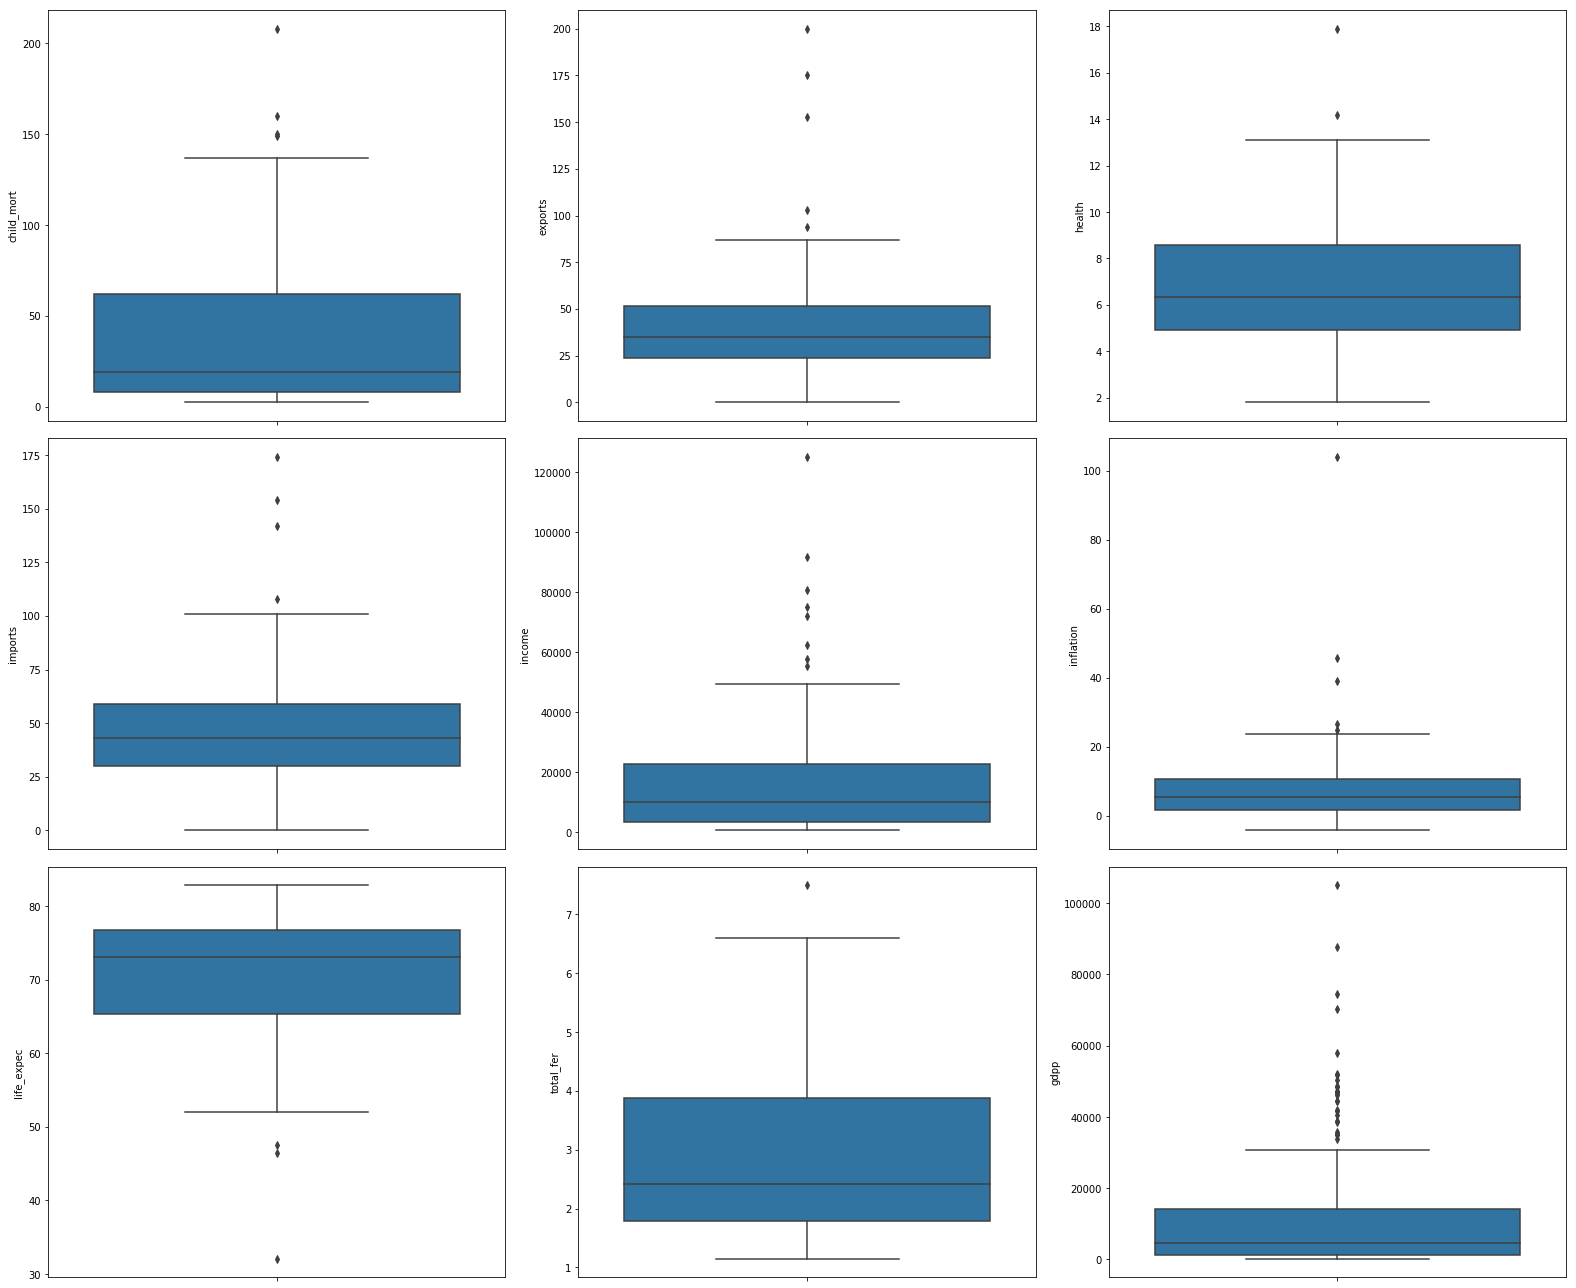

In [9]:
# Outliers detection
fig = plt.figure(figsize=(22,18))
for i in range(len(country_1.columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=country_1.iloc[:,i])
plt.tight_layout()
plt.show()
    

In [189]:
country_1.child_mort.quantile(0.95)

116.0

In [192]:
# Printing Quintile values at the interval of 1 percentile.
for i in range(0,8):
    print(country_1.iloc[:,i].quantile(list(np.arange(0,1.01,0.01))))

0.00      2.600
0.01      2.800
0.02      3.000
0.03      3.196
0.04      3.200
0.05      3.460
0.06      3.792
0.07      3.900
0.08      4.028
0.09      4.100
0.10      4.200
0.11      4.226
0.12      4.484
0.13      4.500
0.14      4.524
0.15      4.780
0.16      5.368
0.17      5.522
0.18      5.952
0.19      6.054
0.20      6.320
0.21      6.800
0.22      6.952
0.23      7.354
0.24      7.768
0.25      8.250
0.26      8.616
0.27      8.946
0.28     10.096
0.29     10.300
0.30     10.380
0.31     10.546
0.32     10.800
0.33     11.112
0.34     11.588
0.35     11.850
0.36     13.656
0.37     14.284
0.38     14.508
0.39     14.822
0.40     15.280
0.41     15.748
0.42     16.572
0.43     16.790
0.44     17.208
0.45     17.400
0.46     18.100
0.47     18.604
0.48     18.868
0.49     19.134
0.50     19.300
0.51     19.766
0.52     20.428
0.53     21.092
0.54     22.652
0.55     24.100
0.56     24.100
0.57     25.720
0.58     26.724
0.59     28.052
0.60     29.160
0.61     30.198
0.62    

In [203]:
# Capping the value Child_Mort under 130.140
country_2 = country_1[country_1.child_mort < 130.140]
country_2.shape

(162, 9)

In [204]:
# Capping the value exports under 87.03 and Flooring the value above 9.1312
country_2 = country_2[country_2.exports <= 87.03]
country_2 = country_2[country_2.exports >= 9.1312]
country_2.shape

(153, 9)

In [205]:
# Capping the value health under 13.4740
country_2 = country_2[country_2.health <= 13.4740]
country_2.shape

(151, 9)

In [206]:
# Capping the value imports under 83.4280 and Flooring the value above 12.9880
country_2 = country_2[country_2.imports <= 83.4280]
country_2 = country_2[country_2.imports >= 12.9880]
country_2.shape

(148, 9)

In [207]:
# Capping the value income under 56,256
country_2 = country_2[country_2.income <= 56256]
country_2.shape

(143, 9)

In [208]:
# Capping the value inflation under 25.9880 and Flooring the value above -1.28824
country_2 = country_2[country_2.inflation <= 25.9880]
country_2 = country_2[country_2.inflation >= -1.28824]
country_2.shape

(138, 9)

In [211]:
# Flooring the value life_expec above 47.160
country_2 = country_2[country_2.life_expec >= 47.160]
country_2.shape

(138, 9)

### We see there are outliers in the dataset which can be treated before Subsequent steps. However looking at the volume of data we have and the number of records we are left with after outlier treatment, we will not remove any rows and proceed with subsequent steps without removing outliers from the data.

## Scaling Data

In [10]:
# importing required sklearn libraries for extracting Principal Components from the data.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [11]:
# Standardizing the data in order to have standard data across the dataset on a common scale.
sc = StandardScaler().fit(country_1)
STD_country = sc.transform(country_1)


In [12]:
#Fitting the pca model onto the standardized data
PCA_country = pca.fit(STD_country)


In [13]:
# Principal Components Loadings
PCA_country.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [14]:
# Eigen vectors arranged in the order of Eigen values.
PCA_country.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [119]:
# Finding the cumulative Sum of the Explained Variance
np.cumsum(PCA_country.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

In [16]:
# Choosing 5 components to proceed with the subsequent data analysis.
column_names = list(country_1.columns)
pcs = pd.DataFrame({'PC1': PCA_country.components_[0], 'PC2':PCA_country.components_[1], 'PC3':PCA_country.components_[2], 'PC4':PCA_country.components_[3], 'PC5':PCA_country.components_[4], 'Features':column_names})
pcs


,PC1,PC2,PC3,PC4,PC5,Features
0,-0.419519,0.192884,-0.029544,0.370653,-0.168970,child_mort
1,0.283897,0.613163,0.144761,0.003091,0.057616,exports
2,0.150838,-0.243087,-0.596632,0.461897,0.518000,health
3,0.161482,0.671821,-0.299927,-0.071907,0.255376,imports
4,0.398441,0.022536,0.301548,0.392159,-0.247150,income
5,-0.193173,-0.008404,0.642520,0.150442,0.714869,inflation
6,0.425839,-0.222707,0.113919,-0.203797,0.108220,life_expec
7,-0.403729,0.155233,0.019549,0.378304,-0.135262,total_fer
8,0.392645,-0.046022,0.122977,0.531995,-0.180167,gdpp


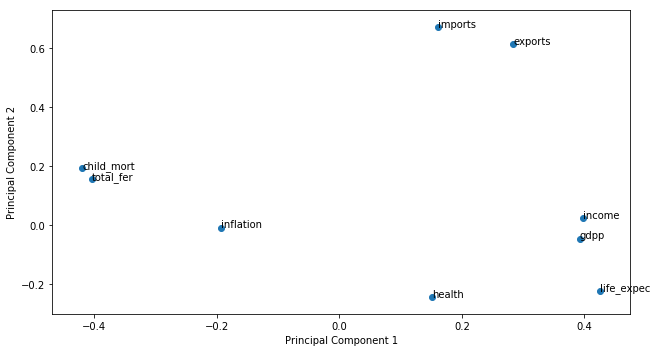

In [18]:
# Plotting PC1 and PC2 on X and Y axis to show how well these components explain different features in the dataset.
fig = plt.figure(figsize=(9,5))
plt.scatter(x=pcs.PC1,y=pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs.Features):
    plt.annotate(txt, (pcs.PC1[i], pcs.PC2[i]))
plt.tight_layout()
plt.show()

### From the above plot we can see how different features are varying from each other. Below can be used later after clustering to compare different features with respect to the custers formed.
- (Child_mort Vs gdpp) OR (Child_mort Vs income)
- gdpp OR income Vs import OR export
- health Vs income OR gdpp

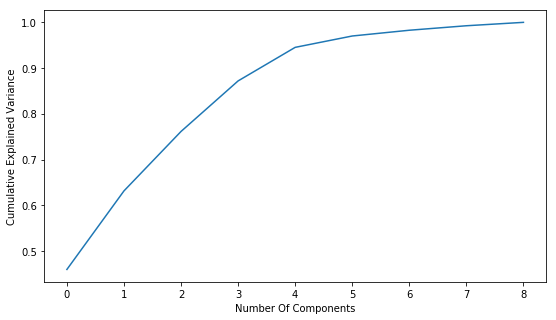

In [19]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize=(9,5))
plt.plot(np.cumsum(PCA_country.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Looks like 5 components are enough to describe 95% of the variance in the dataset
- We'll choose 5 components for our modeling

In [20]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [22]:
pca_final_country = pca_final.fit_transform(STD_country)
pca_final_country.shape

(167, 5)

In [27]:
final_pca_df = pd.DataFrame({'PC1':pca_final_country[:,0], 'PC2':pca_final_country[:,1], 'PC3':pca_final_country[:,2], 'PC4':pca_final_country[:,3], 'PC5':pca_final_country[:,4]})
final_pca_df


,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
5,0.022890,-1.772736,0.864500,-0.036747,0.997895
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832
7,2.342153,-1.989710,0.198795,1.113413,-0.710654
8,2.973841,-0.735152,-0.528284,1.201101,0.080167
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357


## Clustering

In [28]:
# Import necessary libraries

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [120]:
# Hopkins Measure
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [164]:
hopkins(final_pca_df)

0.8642684839164874

#### We're getting value of ~86% for Hopkins measure which indicates the dataset is good enough for clustering.

## K-means

Text(0,0.5,'Sum of squared distance')

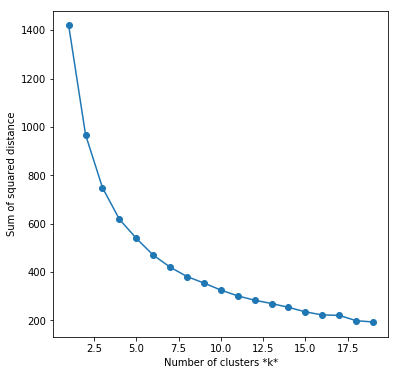

In [31]:
# sum of squared distances
ssd = []
list_k = list(range(1, 20))
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=300)
    model_clus.fit(final_pca_df)
    ssd.append(model_clus.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, ssd, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [32]:
# Silhouette score calculation
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,14):
    kmeans = KMeans(n_clusters=k).fit(final_pca_df)
    sse_.append([k, silhouette_score(final_pca_df, kmeans.labels_)])

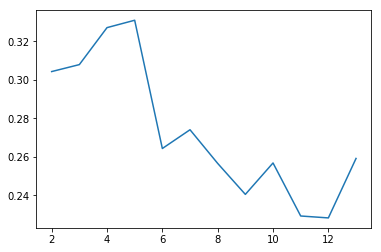

In [35]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);


### From both Scree Plot and Silhouette Analysis, its evident that 5 is the optimal number of clusters that can be formed on the dataset. 

In [36]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50, random_state=42)
model_clus5.fit(final_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [37]:
model_clus5.labels_

array([1, 4, 0, 1, 4, 0, 0, 3, 3, 0, 4, 4, 0, 4, 4, 3, 4, 1, 4, 0, 4, 1,
       0, 3, 4, 1, 1, 4, 1, 3, 4, 1, 1, 0, 0, 0, 1, 1, 1, 4, 1, 4, 4, 4,
       3, 0, 0, 0, 0, 1, 1, 4, 4, 3, 3, 1, 1, 4, 3, 1, 3, 0, 0, 1, 1, 4,
       1, 4, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 0, 1, 1, 3, 4, 1, 4, 4, 1,
       1, 0, 4, 2, 4, 1, 1, 4, 4, 1, 2, 1, 4, 4, 4, 0, 4, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 4, 4, 0, 0, 4, 3, 3, 0, 0, 1, 0, 0, 1, 4, 4,
       1, 2, 4, 4, 4, 1, 4, 3, 0, 0, 1, 0, 3, 3, 0, 1, 4, 1, 1, 0, 4, 0,
       0, 1, 4, 3, 3, 3, 0, 0, 0, 0, 4, 1, 1], dtype=int32)

In [46]:
# analysis of clusters formed based on Original Dataset
country.index = pd.RangeIndex(len(country.index))
country_km = pd.concat([country, pd.Series(model_clus5.labels_)], axis=1)
country_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']


In [53]:
child_mort_mean = pd.DataFrame(country_km.groupby('ClusterID')["child_mort"].mean())
exports_mean = pd.DataFrame(country_km.groupby('ClusterID')["exports"].mean())
health_mean = pd.DataFrame(country_km.groupby('ClusterID')["health"].mean())
imports_mean = pd.DataFrame(country_km.groupby('ClusterID')["imports"].mean())
income_mean = pd.DataFrame(country_km.groupby('ClusterID')["income"].mean())
inflation_mean = pd.DataFrame(country_km.groupby('ClusterID')["inflation"].mean())
life_expec_mean = pd.DataFrame(country_km.groupby('ClusterID')["life_expec"].mean())
total_fer_mean = pd.DataFrame(country_km.groupby('ClusterID')["total_fer"].mean())
gdpp_mean = pd.DataFrame(country_km.groupby('ClusterID')["gdpp"].mean())
avg_km_df = pd.concat([pd.Series([0,1,2,3,4]), child_mort_mean, exports_mean, health_mean, imports_mean, income_mean, inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean], axis=1)
avg_km_df.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
avg_km_df



,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,26.917778,30.977533,5.389333,33.803687,12301.333333,10.857689,72.206667,2.566222,6009.244444
1,1,94.180435,28.928478,6.344565,42.502174,3752.021739,11.920109,59.013043,5.017826,1866.347826
2,2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,3,5.100000,44.848148,9.361111,37.981481,46833.333333,2.891963,80.437037,1.838519,45322.222222
4,4,15.160870,52.208696,7.189565,62.150000,14791.521739,3.851261,73.973913,2.005000,8964.043478


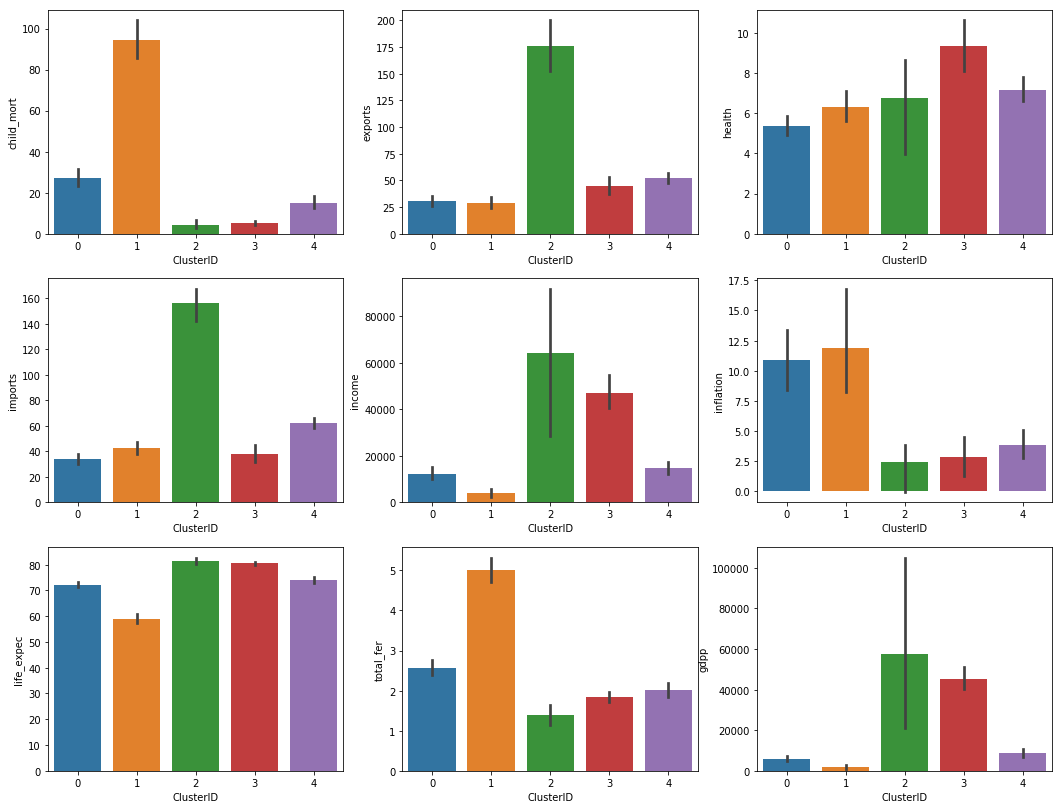

In [168]:
# Bar plot to visualize different clusters wrt each continous data for KMeans clustering
fig = plt.figure(figsize=(18,14))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.barplot(x=country_km.ClusterID, y=country_km.iloc[:,i])
plt.show()

In [166]:
# Analysis of Cluster formed on PC Dataframe
final_pca_df.index = pd.RangeIndex(len(final_pca_df.index))
final_pca_km = pd.concat([final_pca_df, pd.Series(model_clus5.labels_)], axis=1)
final_pca_km.rename(columns={0:'ClusterID'}, inplace=True)
final_pca_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,4
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,4
5,0.022890,-1.772736,0.864500,-0.036747,0.997895,0
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,0
7,2.342153,-1.989710,0.198795,1.113413,-0.710654,3
8,2.973841,-0.735152,-0.528284,1.201101,0.080167,3
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357,0


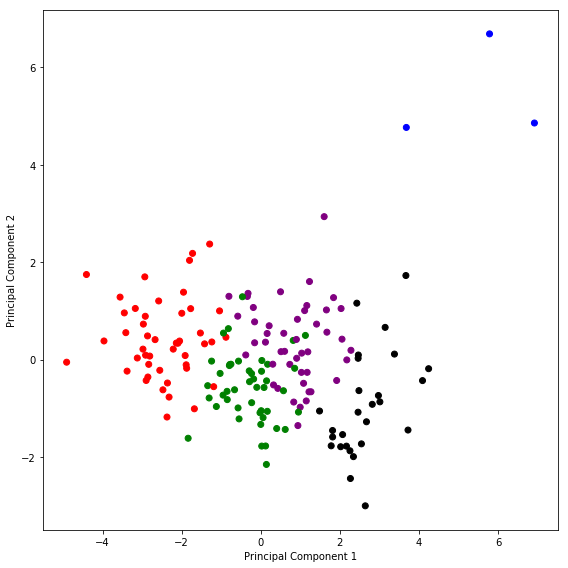

In [167]:
# Visualization on Kmeans Algorithm w.r.t PC1 and PC2 
fig = plt.figure(figsize=(8,8))
plt.scatter(x=final_pca_km.PC1, y=final_pca_km.PC2, c=final_pca_km.ClusterID.map({0:'green',1:'red',2:'blue',3:'black',4:'purple'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

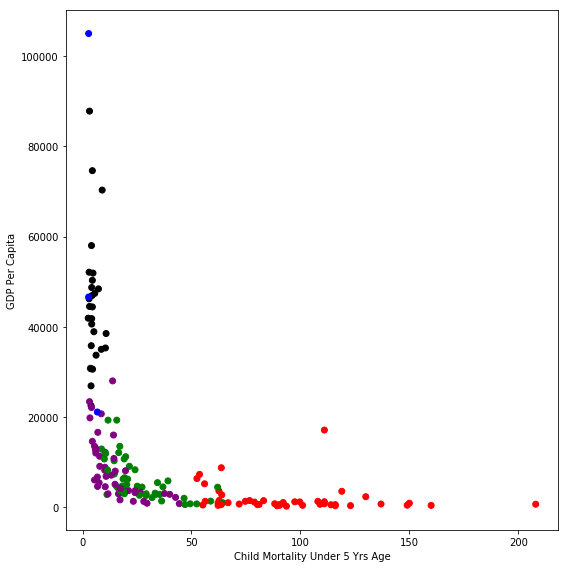

In [76]:
# Visualization on Kmeans Algorithm w.r.t GDPP and Child_mortality 
fig = plt.figure(figsize=(8,8))
plt.scatter(x=country_km.child_mort, y=country_km.gdpp, c=country_km.ClusterID.map({0:'green',1:'red',2:'blue',3:'black',4:'purple'}))
plt.ylabel('GDP Per Capita')
plt.xlabel('Child Mortality Under 5 Yrs Age')
plt.tight_layout()
plt.show()




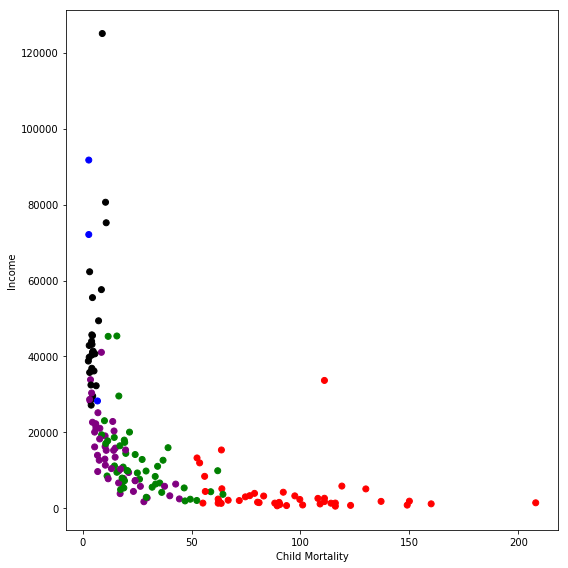

In [78]:
# Visualization on Kmeans Algorithm w.r.t Child_mort and income 
fig = plt.figure(figsize=(8,8))
plt.scatter(x=country_km.child_mort, y=country_km.income, c=country_km.ClusterID.map({0:'green',1:'red',2:'blue',3:'black',4:'purple'}))
plt.ylabel('Income')
plt.xlabel('Child Mortality')
plt.tight_layout()
plt.show()

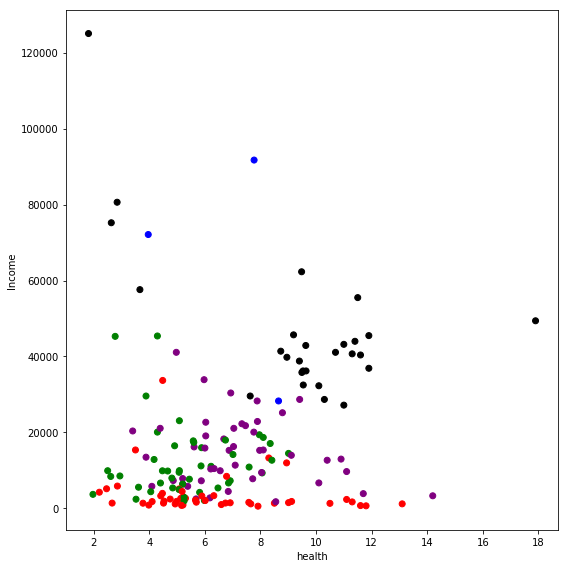

In [79]:
# Visualization on Kmeans Algorithm w.r.t health and income 
fig = plt.figure(figsize=(8,8))
plt.scatter(x=country_km.health, y=country_km.income, c=country_km.ClusterID.map({0:'green',1:'red',2:'blue',3:'black',4:'purple'}))
plt.ylabel('Income')
plt.xlabel('health')
plt.tight_layout()
plt.show()

### Based on Kmeans algorithm, here are the list of factors that will drive the selection of countries that are in dire need of aid based on their socio economic factors:
- GDPP < 1866.34 AND Child_mort > 94.18 AND income < 3752 AND inflation > 11.92 AND life_exp < 59.01 AND total_fert > 5.01 AND health < 6.34.
- Cluster 1 formed through Kmeans give a solid bunch of countries that are in dire need of help.

In [178]:
# List of countries that should be considered as part of the relief/aid program based on Kmeans
country_km[((country_km.gdpp < 1866.34) & (country_km.child_mort > 94.18) & (country_km.health < 6.34) & (country_km.life_expec < 59.01))]



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.91,57.3,5.11,1310,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220,1
63,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,1
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419,1
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1


## Heirarchical Clustering

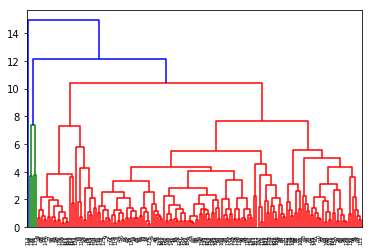

In [80]:
# heirarchical clustering
mergings = linkage(final_pca_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### From the above dendrogram it looks like 6 would form a good number of clusters

In [110]:
# Clustering with 6 
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
country_hc = pd.concat([country, clusterCut], axis=1)
country_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']



In [111]:
#Analysis of Cluster formed using Heirarchical Clustering on PC Dataframe
final_pca_hc = pd.concat([final_pca_df, clusterCut], axis=1)
final_pca_hc.rename(columns={0:'ClusterID'}, inplace=True)
final_pca_hc

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1
5,0.022890,-1.772736,0.864500,-0.036747,0.997895,1
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,1
7,2.342153,-1.989710,0.198795,1.113413,-0.710654,2
8,2.973841,-0.735152,-0.528284,1.201101,0.080167,2
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357,1


In [112]:
child_mort_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["child_mort"].mean())
exports_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["exports"].mean())
health_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["health"].mean())
imports_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["imports"].mean())
income_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["income"].mean())
inflation_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["inflation"].mean())
life_expec_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["life_expec"].mean())
total_fer_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["total_fer"].mean())
gdpp_mean_hc = pd.DataFrame(country_hc.groupby('ClusterID')["gdpp"].mean())

avg_hc_df = pd.concat([pd.Series([0,1,2,3,4,5]), child_mort_mean_hc, exports_mean_hc, health_mean_hc, imports_mean_hc, income_mean_hc, inflation_mean_hc, life_expec_mean_hc, total_fer_mean_hc, gdpp_mean_hc], axis=1)
avg_hc_df.columns = ['ClusterID', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
avg_hc_df



,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,96.000000,30.537368,7.028684,47.913158,3508.763158,8.198553,57.884211,5.061579,1793.342105
1,1,25.538298,38.631691,6.183511,45.263467,11871.063830,7.979511,72.460638,2.455106,6878.053191
2,2,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42150.000000
3,3,2.800000,187.500000,5.865000,158.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000
4,4,10.600000,123.400000,6.025000,131.000000,24350.000000,-0.190000,76.850000,1.765000,15950.000000
5,5,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


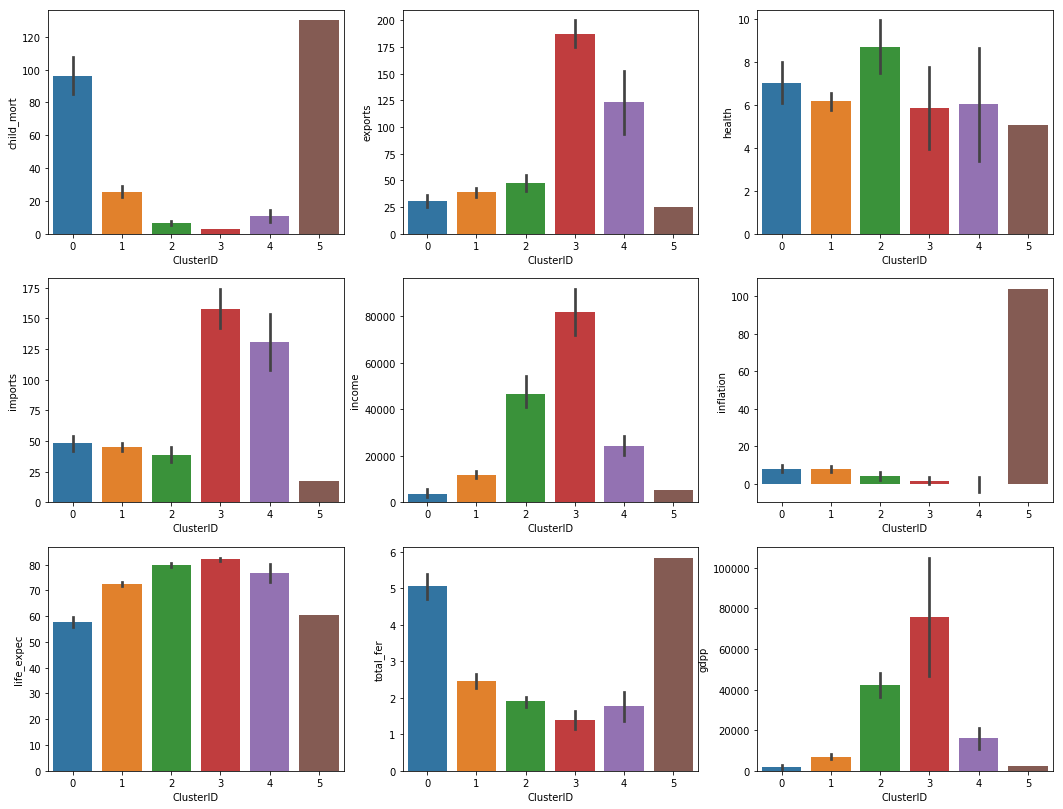

In [169]:
# Bar plot to visualize different clusters wrt each continous data for Heirarchical clustering
fig = plt.figure(figsize=(18,14))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.barplot(x=country_hc.ClusterID, y=country_hc.iloc[:,i])
plt.show()

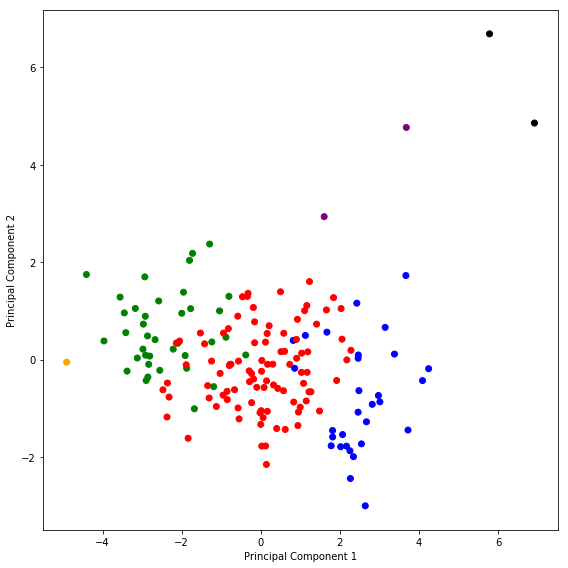

In [114]:
# Visualizations on PC1 and PC2
fig = plt.figure(figsize = (8,8))
plt.scatter(final_pca_hc.PC1, final_pca_hc.PC2, c = final_pca_hc.ClusterID.map({0:'green',1:'red',2:'blue',3:'black',4:'purple', 5:'orange'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

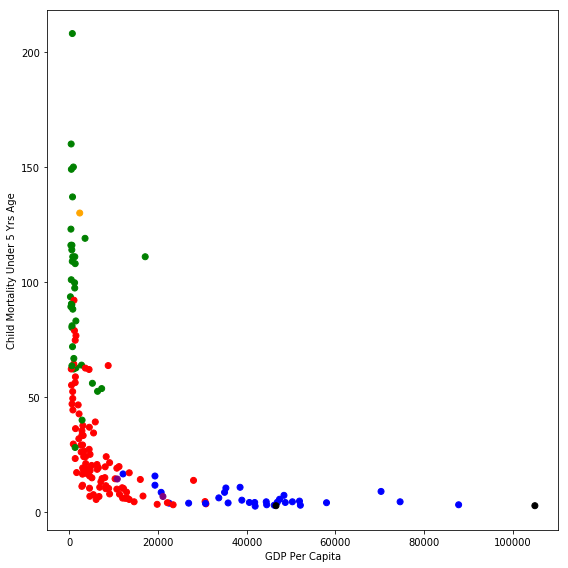

In [118]:
# Visualizations on gdpp and child_mort
fig = plt.figure(figsize = (8,8))
plt.scatter(country_hc.gdpp, country_hc.child_mort, c = country_hc.ClusterID.map({0:'green',1:'red',2:'blue',3:'black',4:'purple',5:'orange'}))
plt.xlabel('GDP Per Capita')
plt.ylabel('Child Mortality Under 5 Yrs Age')
plt.tight_layout()
plt.show()

### Based on Heirarchical algorithm, here are the list of factors that will drive the selection of countries that are in dire need of aid based on their socio economic factors:
- GDPP < 1793.34 AND Child_mort > 96.00 AND income < 3508.76 AND inflation > 8.20 AND life_exp < 57.9 AND total_fert > 5.06 AND health < 7.02.
- Cluster 0 formed through Heirarchical give a solid bunch of countries that are in dire need of help.



In [184]:
# List of countries that should be considered as part of the relief/aid program based on Heirarchical
country_hc[((country_hc.gdpp < 1793.34) & (country_hc.child_mort > 96) & (country_hc.life_expec < 57.9) & (country_hc.total_fer > 5.06) & (country_hc.health < 7.02))]



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.91,57.3,5.11,1310,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220,0
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419,0
